 #                                    Project 2018 - Box Plots

 ## 1. History and uses of Box Plots

John Tukey introduced the box and whiskers plot as part of his toolkit for exploratory data analysis. Over 40 years later, the boxplot has become one of the most frequently used tools for data visualisation
and is one of the few plot types invented in the 20th century that has found widespread adoption.

The box plot was originally designed to be computated and drawn by hand. The basic graphic form of the boxplot, the range-bar, was established in the early 1950’s by M. E. Spear in the book Charting Statistics.

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. Essentilly, it is a good way to see how your data is spread out. 

A box plot can be used in may scenarios where you have two dimensions and you want to see distrubtion of your data
over those dimensions e.g. in the next section I use a box plot to show the distribution of foreign currency rates
by year.
Another example is Met Eireann using box plots to show the temperature distribution by month. 

In [1]:
# import pandas library; pandas is a library used for data analysis and creating data structures in Python
import pandas as pa
# import numpy library; numpy is a statistical library used for data analysis using Python
import numpy as np
 # import seaborn library; seaborn is a data visualization library based on matplotlib.
import seaborn as sns
# import Matplotlib library; matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import scipy library; scipy is a package for mathematics, science, and engineering and libraries
import scipy.stats as ss

## 2. Box plots - Foreign Currency tracking

The idea of using foreign curreny data is derived from a similar visual plot called the 'Candlestick Plot' in FX trading.
A **Candlestick plot** is similar to a box plot as it shows the minimum and maximum value signifiying the opening and closing 
currency values while the wick illustrates the highest and lowest traded values during the time interval.

The datset used for this project was taken from the European Central Bank website and saved to a Github repository. 

In [2]:
# import dataset from Github using pandas which creates a dataframe
dateCol = ['Date']
fx = pa.read_csv("https://raw.githubusercontent.com/donalcarr85/Datasets/master/eurofxref-hist.csv",
                 parse_dates=dateCol)
fx;

In [3]:
# Convert to datetime data type
fx["YearDate"]= pa.to_datetime(fx["Date"]) 

In [4]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html - index by year only
fx['Year'] = pa.DatetimeIndex(fx['Date']).year

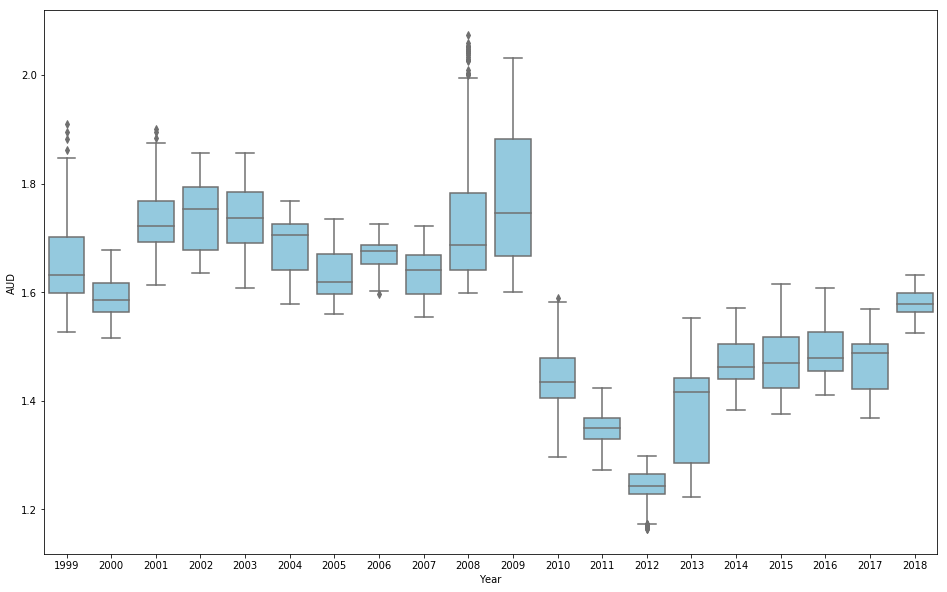

In [5]:
# create matplotlib figure with size dimensions
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.boxplot(x="Year", y="AUD", data=fx,color="skyblue")

In [6]:
# group data points by year and get descriptive statistics
print (fx.groupby('Year').describe())

        AUD                                                                 
      count      mean       std     min       25%      50%       75%     max
Year                                                                        
1999  259.0  1.652342  0.079822  1.5274  1.598800  1.63240  1.702350  1.9100
2000  255.0  1.588947  0.035807  1.5155  1.563600  1.58620  1.617150  1.6770
2001  254.0  1.731871  0.059756  1.6137  1.692225  1.72260  1.767500  1.9000
2002  255.0  1.737645  0.063116  1.6360  1.678400  1.75260  1.793100  1.8556
2003  255.0  1.737941  0.061568  1.6079  1.691050  1.73730  1.784100  1.8554
2004  259.0  1.690489  0.048715  1.5781  1.641650  1.70550  1.725650  1.7673
2005  257.0  1.631962  0.043731  1.5593  1.596900  1.61840  1.669500  1.7354
2006  255.0  1.666811  0.032128  1.5974  1.651300  1.67530  1.687100  1.7260
2007  255.0  1.634836  0.038079  1.5536  1.596950  1.64130  1.667500  1.7213
2008  256.0  1.741623  0.136972  1.5984  1.640375  1.68645  1.782625  2.0735

## 3. Box Plot Terminology

Here I will explain the various elements of a box plot referencing plot and summary statistics above:
    1. Median: is the middle point of the data set (50th percentile) i,e, the horizontal line within the box
        Example - 1999 the median is 1.63
    2. First Quartile: the middle number between the smallest number (not the "minimum") and the median of the dataset.
        Example - 2018: 1.56
    3. Third Quartile: the middle value between the median and the highest value (not the "maximum") of the dataset.
        Example - 2018: 1.59
    4. Interquartile Range: the area between the 25th and 75th percentile i.e. rectangle 
    5. Whiskers - line connecting the quartiles to the minumum or maximum values
    6. Outliers - is any value that lies more than one and a half times the length of the box from either end of the box.
    

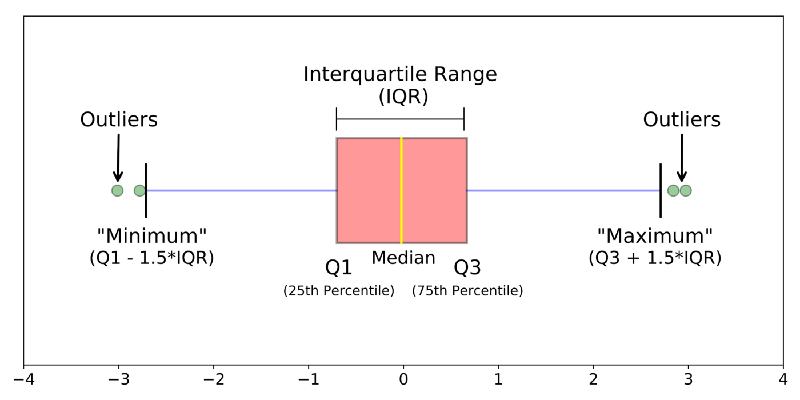

In [7]:
# display box plot image
from IPython.display import Image
Image(filename="BP.jpg")

## 4. Alternatives to Box Plots

One alternative to box and whisker plots is the **Violin** plot in the Seaborn library. It combines a box plot with a 
kernal density estimate. Unlike a box plot, it shows a kernal estimation and not actual datapoints. 

In the violin chart below you can see that kernal density diagram is small and focused around 1.2 to to 1.4 exchange rate, where
in 2008 the kernal density is narrow and shows more divergance from the median value. 

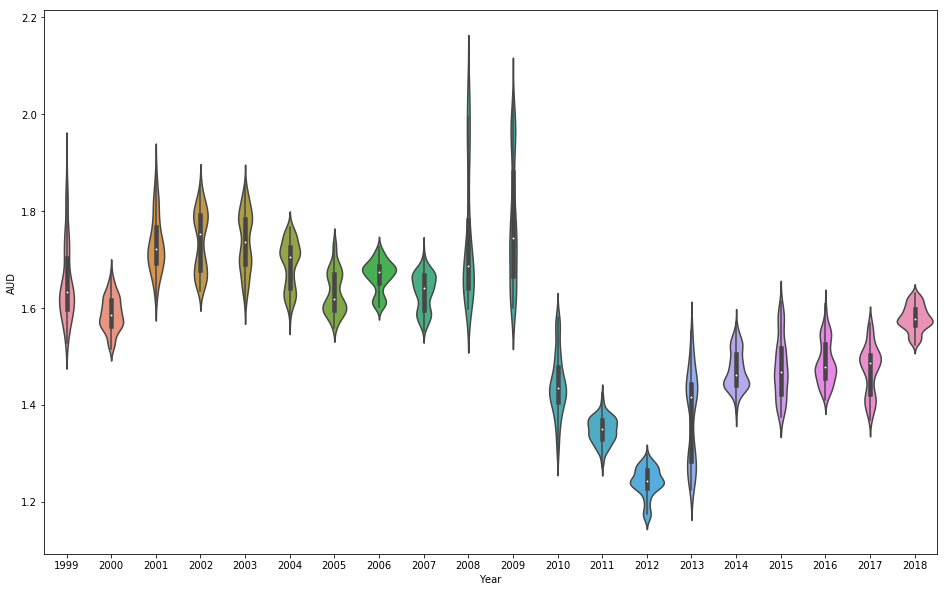

In [8]:
## http://lewisdavi.es/seaborn/box-and-whisker-plots-with-alternatives.html
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.violinplot(data=fx, x='Year', y='AUD')

Another alternative is a **beanplot**. A beanplot is variant of a violin plot and it provides a visual summary of data in terms of value distribution and individual measurements. Such representations makes it easy to spot anomalies in data, such as outliers. Each observation is shown with a black line as per the plot below.

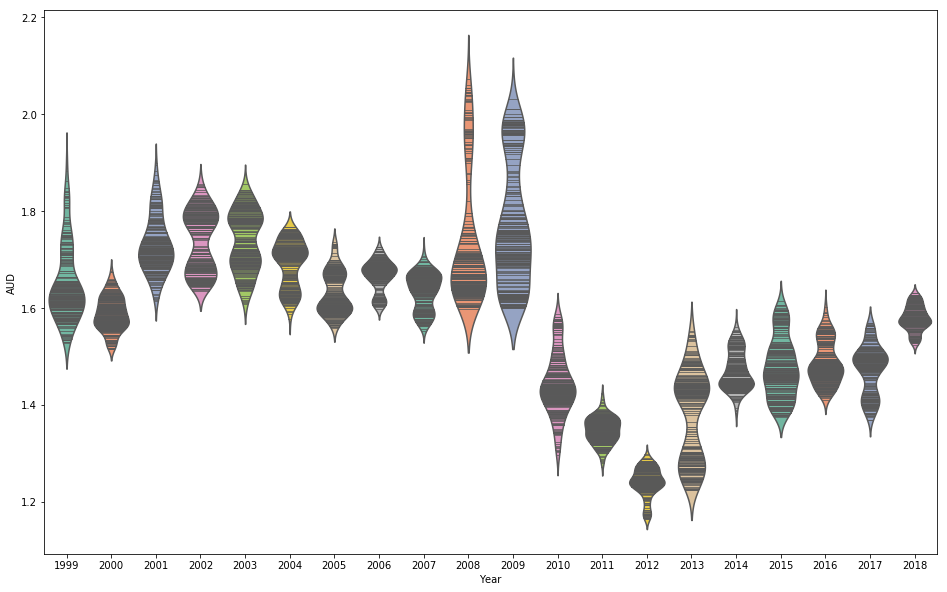

In [9]:
## https://seaborn.pydata.org/generated/seaborn.violinplot.html ##
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.violinplot(x="Year", y="AUD",
                    data=fx, palette="Set2", split=True,
                    scale="count", inner="stick")

A common approach to understanding the distribution of data is using a **histogram**. A histogram is usually used for showing a
normally distributed dataset i.e. most of the data centres around the average with 
68% of the data within 1 standard deviation of the mean, 
95% of the data is within 2 standard deviations of the mean , and 99.7% of the data is within 3 standard deviations
of the mean. 

The histogram is similar to the box plot in that you get an understanding of the spread of your data. However, it is one dimensional unlike the plots above so you cannot see the distribution by year. Box plots 
would be more benefial for spotting outliers and are more informative as you can see the quartiles, min, max and median values. 

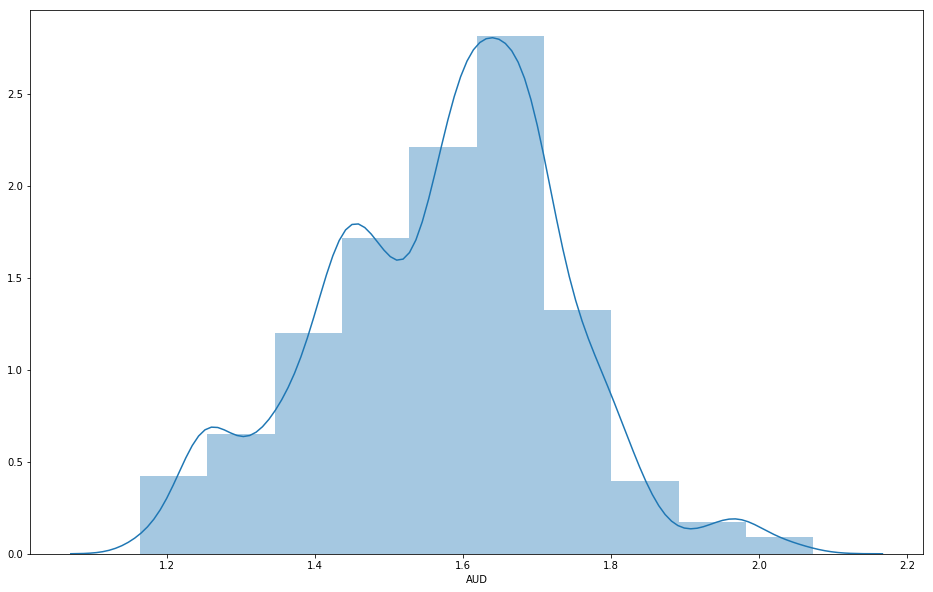

In [10]:
## https://seaborn.pydata.org/tutorial/distributions.html
np.warnings.filterwarnings('ignore')
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.distplot(fx.AUD, bins=10)

## Conclusion

To summarise, a box plot is a great visual tool if you are interested in seeing a more detailed view of the spread of your data.
Unlike, the histogram for example, one can see various descriptive statistical properties such as the median and quartiles
without using the describe() function. 

Another advantage of the box plot is its identification of outliers and as the plot is two dimensional makes it more flexible for visualisations than a 1D plot such as the histogram. 

There are many variations of the box plot today and that is a testament to its inital widespread adoption and continued use
as a great visualisation tool for understanding the distribution of your data. 

## Bibliography

http://mathworld.wolfram.com/Box-and-WhiskerPlot.html


Hadley Wickham and Lisa Stryjewski, 2011 '40 Years of Box Plots',
http://vita.had.co.nz/papers/boxplots.pdf 


John W Tukey 1970, 'Exploratory Data Analysis: Past, Present, and Future', 
https://apps.dtic.mil/dtic/tr/fulltext/u2/a266775.pdf


http://www.physics.csbsju.edu/stats/box2.html


https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


https://www.investing.com/analysis/cutting-through-market-noise-with-boxplots-190669


http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/


https://www.purplemath.com/modules/boxwhisk3.htm


http://lewisdavi.es/seaborn/box-and-whisker-plots-with-alternatives.html


https://mathisonian.github.io/kde/


https://seaborn.pydata.org/tutorial/distributions.html


https://www.weather.gov/media/erh/ta2011-01.pdf
